# Peaking into the UK Time-Use Study 2000

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH_TO_FOLDER = Path('/Users/Trondle/Sync/cambridge/data/UKDA-4504-tab/tab/')

## Household Questionaire

In [3]:
data = pd.read_csv(
    PATH_TO_FOLDER / 'hhld_data_6.tab',
    delimiter='\t',
    low_memory=False # some columns seem to have mixed types
)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6414 entries, 0 to 6413
Columns: 1507 entries, SN1 to WTDWH_UG
dtypes: int64(1499), object(8)
memory usage: 73.7+ MB


In [5]:
len(data)

6414

### Example Analysis: plot default age distribution

In [6]:
col_names = ['AGE{:0>2}'.format(id) for id in range(1, 11)]
data['default_ages'] = data.apply(
    lambda row: np.mean([row[col] for col in col_names if row[col] is not -1]), 
    axis=1
)

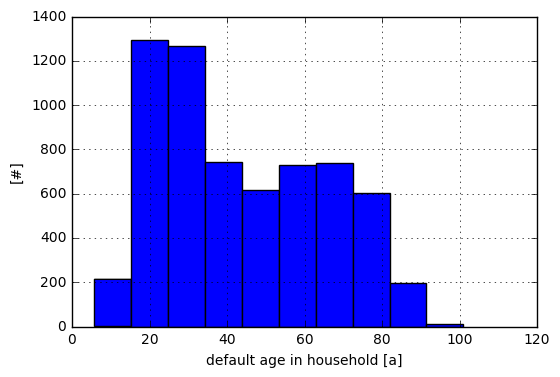

In [7]:
data.default_ages.hist()
_ = plt.xlabel('default age in household [a]')
_ = plt.ylabel('[#]')

In [8]:
data.default_ages.min()

5.7999999999999998

In [9]:
youngest_household = data[data.default_ages == data.default_ages.min()]

In [10]:
youngest_household[col_names]

,AGE01,AGE02,AGE03,AGE04,AGE05,AGE06,AGE07,AGE08,AGE09,AGE10
3430,22,4,2,1,0,-1,-1,-1,-1,-1


Poor 22yr old person.

## Individual Questionaire

In [11]:
data = pd.read_csv(
    PATH_TO_FOLDER / 'Individual_data_5.tab',
    delimiter='\t',
    low_memory=False # some columns seem to have mixed types
)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Columns: 2022 entries, SN1 to WTPQ_UG
dtypes: float64(4), int64(2016), object(2)
memory usage: 179.9+ MB


In [13]:
len(data)

11664

## Worksheet Questionaire

In [14]:
data = pd.read_csv(
    PATH_TO_FOLDER / 'worksheet_data_3.tab',
    delimiter='\t',
    low_memory=False # some columns seem to have mixed types
)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Columns: 772 entries, SN1 to WTWRK_UG
dtypes: float64(4), int64(54), object(714)
memory usage: 57.9+ MB


In [16]:
len(data)

9823

## Diary Questionaire

In [17]:
data = pd.read_csv(
    PATH_TO_FOLDER / 'diary_data_8.tab',
    delimiter='\t',
    low_memory=False # some columns seem to have mixed types
)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20981 entries, 0 to 20980
Columns: 3164 entries, SN1 to WTDRY_UG
dtypes: float64(2), int64(1280), object(1882)
memory usage: 506.5+ MB


In [19]:
len(data)

20981

In [20]:
len(data[data.ISBA == 12])

3096

There are 3096 entries from London.

## Diary Episode Data File

`diary_data_8_episode.tab`

This file doesn't seem necessary at the moment as it is a processed version of the Diary file.